# Data Preprocessing

---

In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
import pickle
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("((GAssign) BankLoanApproval.csv")
data.head()
data.info()
data.describe()
data.columns
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255327 entries, 0 to 255326
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255327 non-null  object 
 1   Age             255327 non-null  int64  
 2   Income          255327 non-null  int64  
 3   LoanAmount      255327 non-null  int64  
 4   CreditScore     255327 non-null  int64  
 5   MonthsEmployed  255327 non-null  int64  
 6   NumCreditLines  255327 non-null  int64  
 7   InterestRate    255327 non-null  float64
 8   LoanTerm        255327 non-null  int64  
 9   DTIRatio        255327 non-null  float64
 10  Education       255327 non-null  object 
 11  EmploymentType  255327 non-null  object 
 12  MaritalStatus   255327 non-null  object 
 13  HasMortgage     255327 non-null  object 
 14  HasDependents   255327 non-null  object 
 15  LoanPurpose     255327 non-null  object 
 16  HasCoSigner     255327 non-null  object 
 17  Default   

(255327, 18)

In [4]:
print(data.isnull().sum())
data.duplicated().any()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


False

In [5]:
print(data['Education'].value_counts())
print(data['MaritalStatus'].value_counts())
print(data['HasMortgage'].value_counts())
print(data['HasDependents'].value_counts())
print(data['LoanPurpose'].value_counts())
print(data['EmploymentType'].value_counts())
print(data['HasCoSigner'].value_counts())

Education
Bachelor's     64360
High School    63895
Master's       63538
PhD            63534
Name: count, dtype: int64
MaritalStatus
Married     85295
Divorced    85024
Single      85008
Name: count, dtype: int64
HasMortgage
Yes    127664
No     127663
Name: count, dtype: int64
HasDependents
Yes    127735
No     127592
Name: count, dtype: int64
LoanPurpose
Business     51296
Home         51280
Education    51002
Other        50909
Auto         50840
Name: count, dtype: int64
EmploymentType
Part-time        64156
Unemployed       63819
Self-employed    63702
Full-time        63650
Name: count, dtype: int64
HasCoSigner
Yes    127690
No     127637
Name: count, dtype: int64


# Data Splitting

---

In [6]:
# Identify the features (X) and the target variable (y)
X = data.drop(["LoanID", "Default"], axis=1)  # Features excluding the target variable
y = data["Default"]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = ["Education", "EmploymentType", "MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]
numerical_columns = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed", "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio"]

In [7]:
# Data Preprocessing on Training Set
label_encoder = LabelEncoder()

# Apply label encoding to the training set
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

# Apply label encoding to each categorical column
for column in categorical_columns:
    X_train_encoded[column] = label_encoder.fit_transform(X_train[column])
    X_test_encoded[column] = label_encoder.transform(X_test[column])

In [8]:
scaler = StandardScaler()

X_train_scaled = X_train_encoded.copy()
X_test_scaled = X_test_encoded.copy()

# Fit and transform the training set
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_scaled[numerical_columns])

# Apply the same transformations to the testing set
X_test_scaled[numerical_columns] = scaler.transform(X_test_scaled[numerical_columns])

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_encoded_resampled, y_train_encoded_resampled = smote.fit_resample(X_train_encoded, y_train)

In [10]:
smote = SMOTE(random_state=42)
X_train_scaled_resampled, y_train_scaled_resampled = smote.fit_resample(X_train_scaled, y_train)

# Data Exploration

---

In [11]:
print("Summary Statistics for Numerical Features:")
print(X_train_encoded.describe())

Summary Statistics for Numerical Features:
                 Age         Income     LoanAmount    CreditScore  \
count  204261.000000  204261.000000  204261.000000  204261.000000   
mean       43.503194   82571.469850  127514.207538     574.235228   
std        14.997332   38982.761997   70774.490406     158.816469   
min        18.000000   15000.000000    5000.000000     300.000000   
25%        31.000000   48837.000000   66129.000000     437.000000   
50%        43.000000   82539.000000  127455.000000     574.000000   
75%        56.000000  116347.000000  188779.000000     711.000000   
max        69.000000  149999.000000  249998.000000     849.000000   

       MonthsEmployed  NumCreditLines   InterestRate       LoanTerm  \
count   204261.000000   204261.000000  204261.000000  204261.000000   
mean        59.543579        2.502387      13.489267      36.032135   
std         34.652418        1.116836       6.639073      16.985709   
min          0.000000        1.000000       2.00000

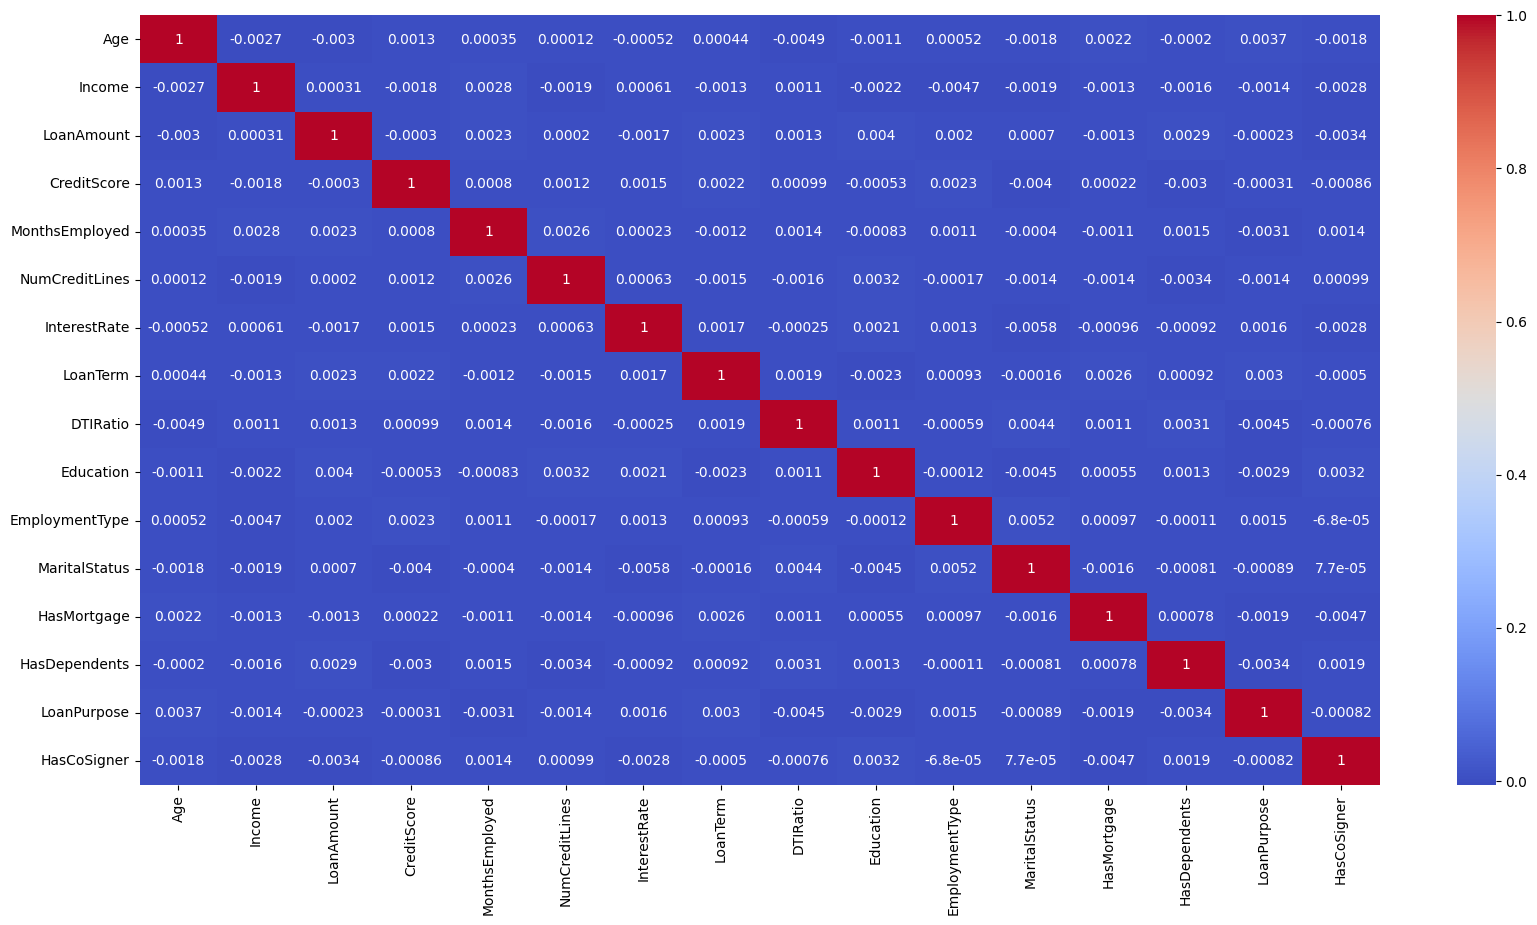

In [15]:
plt.figure(figsize=(20, 10))
correlation_matrix = X_train_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

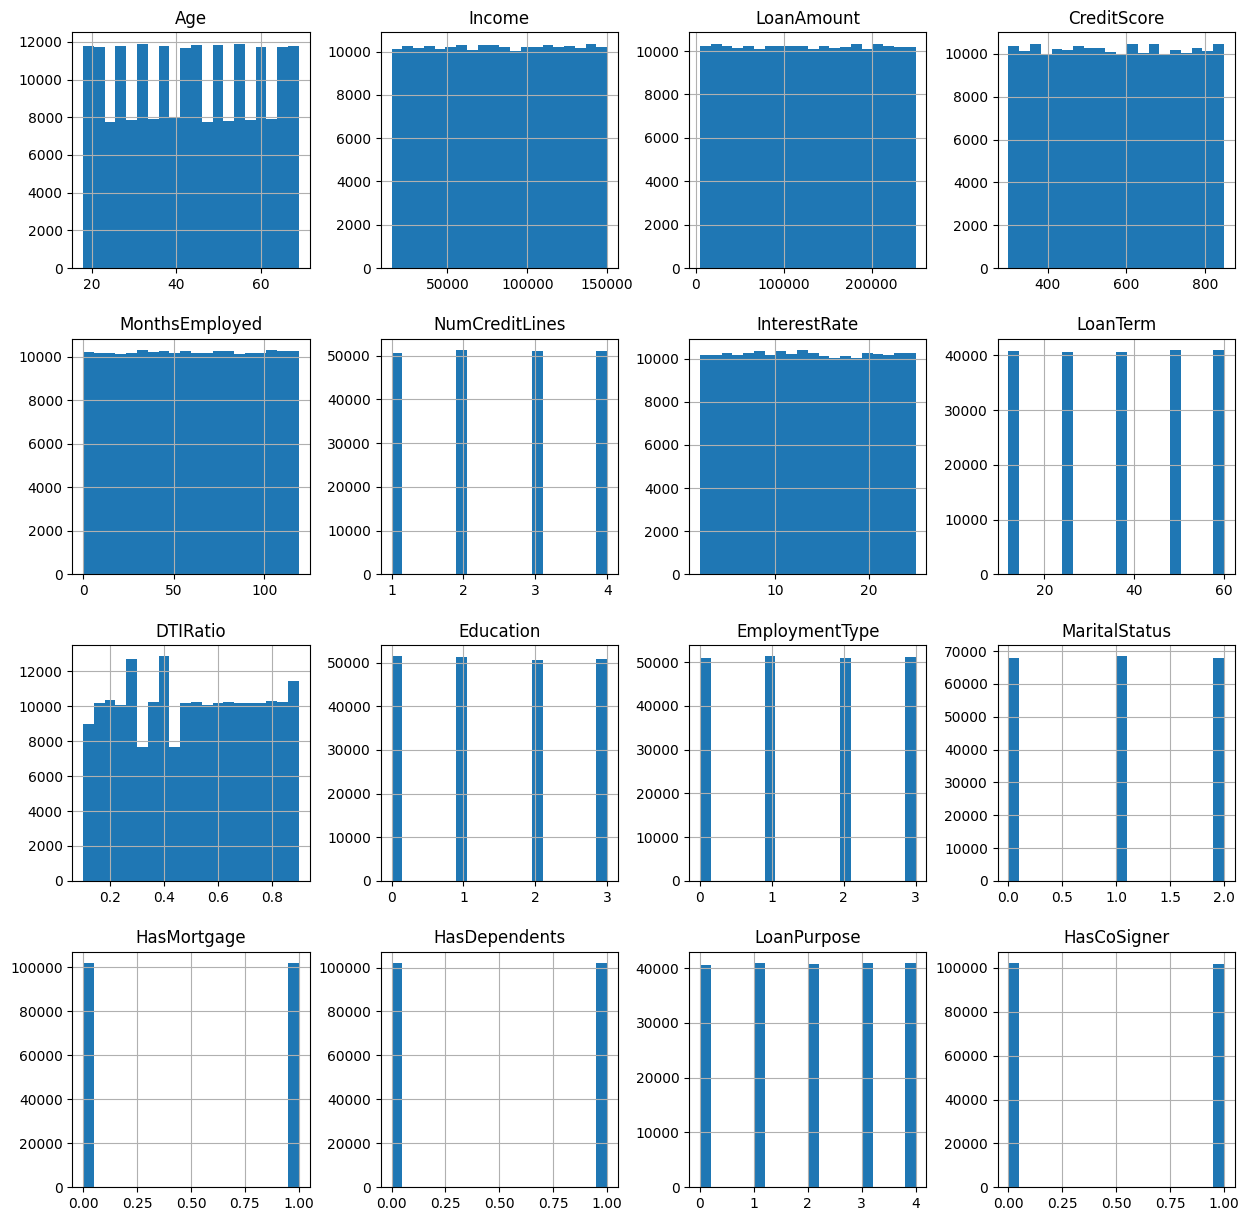

In [16]:
# Histograms for numerical features
X_train_encoded.hist(bins=20, figsize=(15, 15))
plt.show()

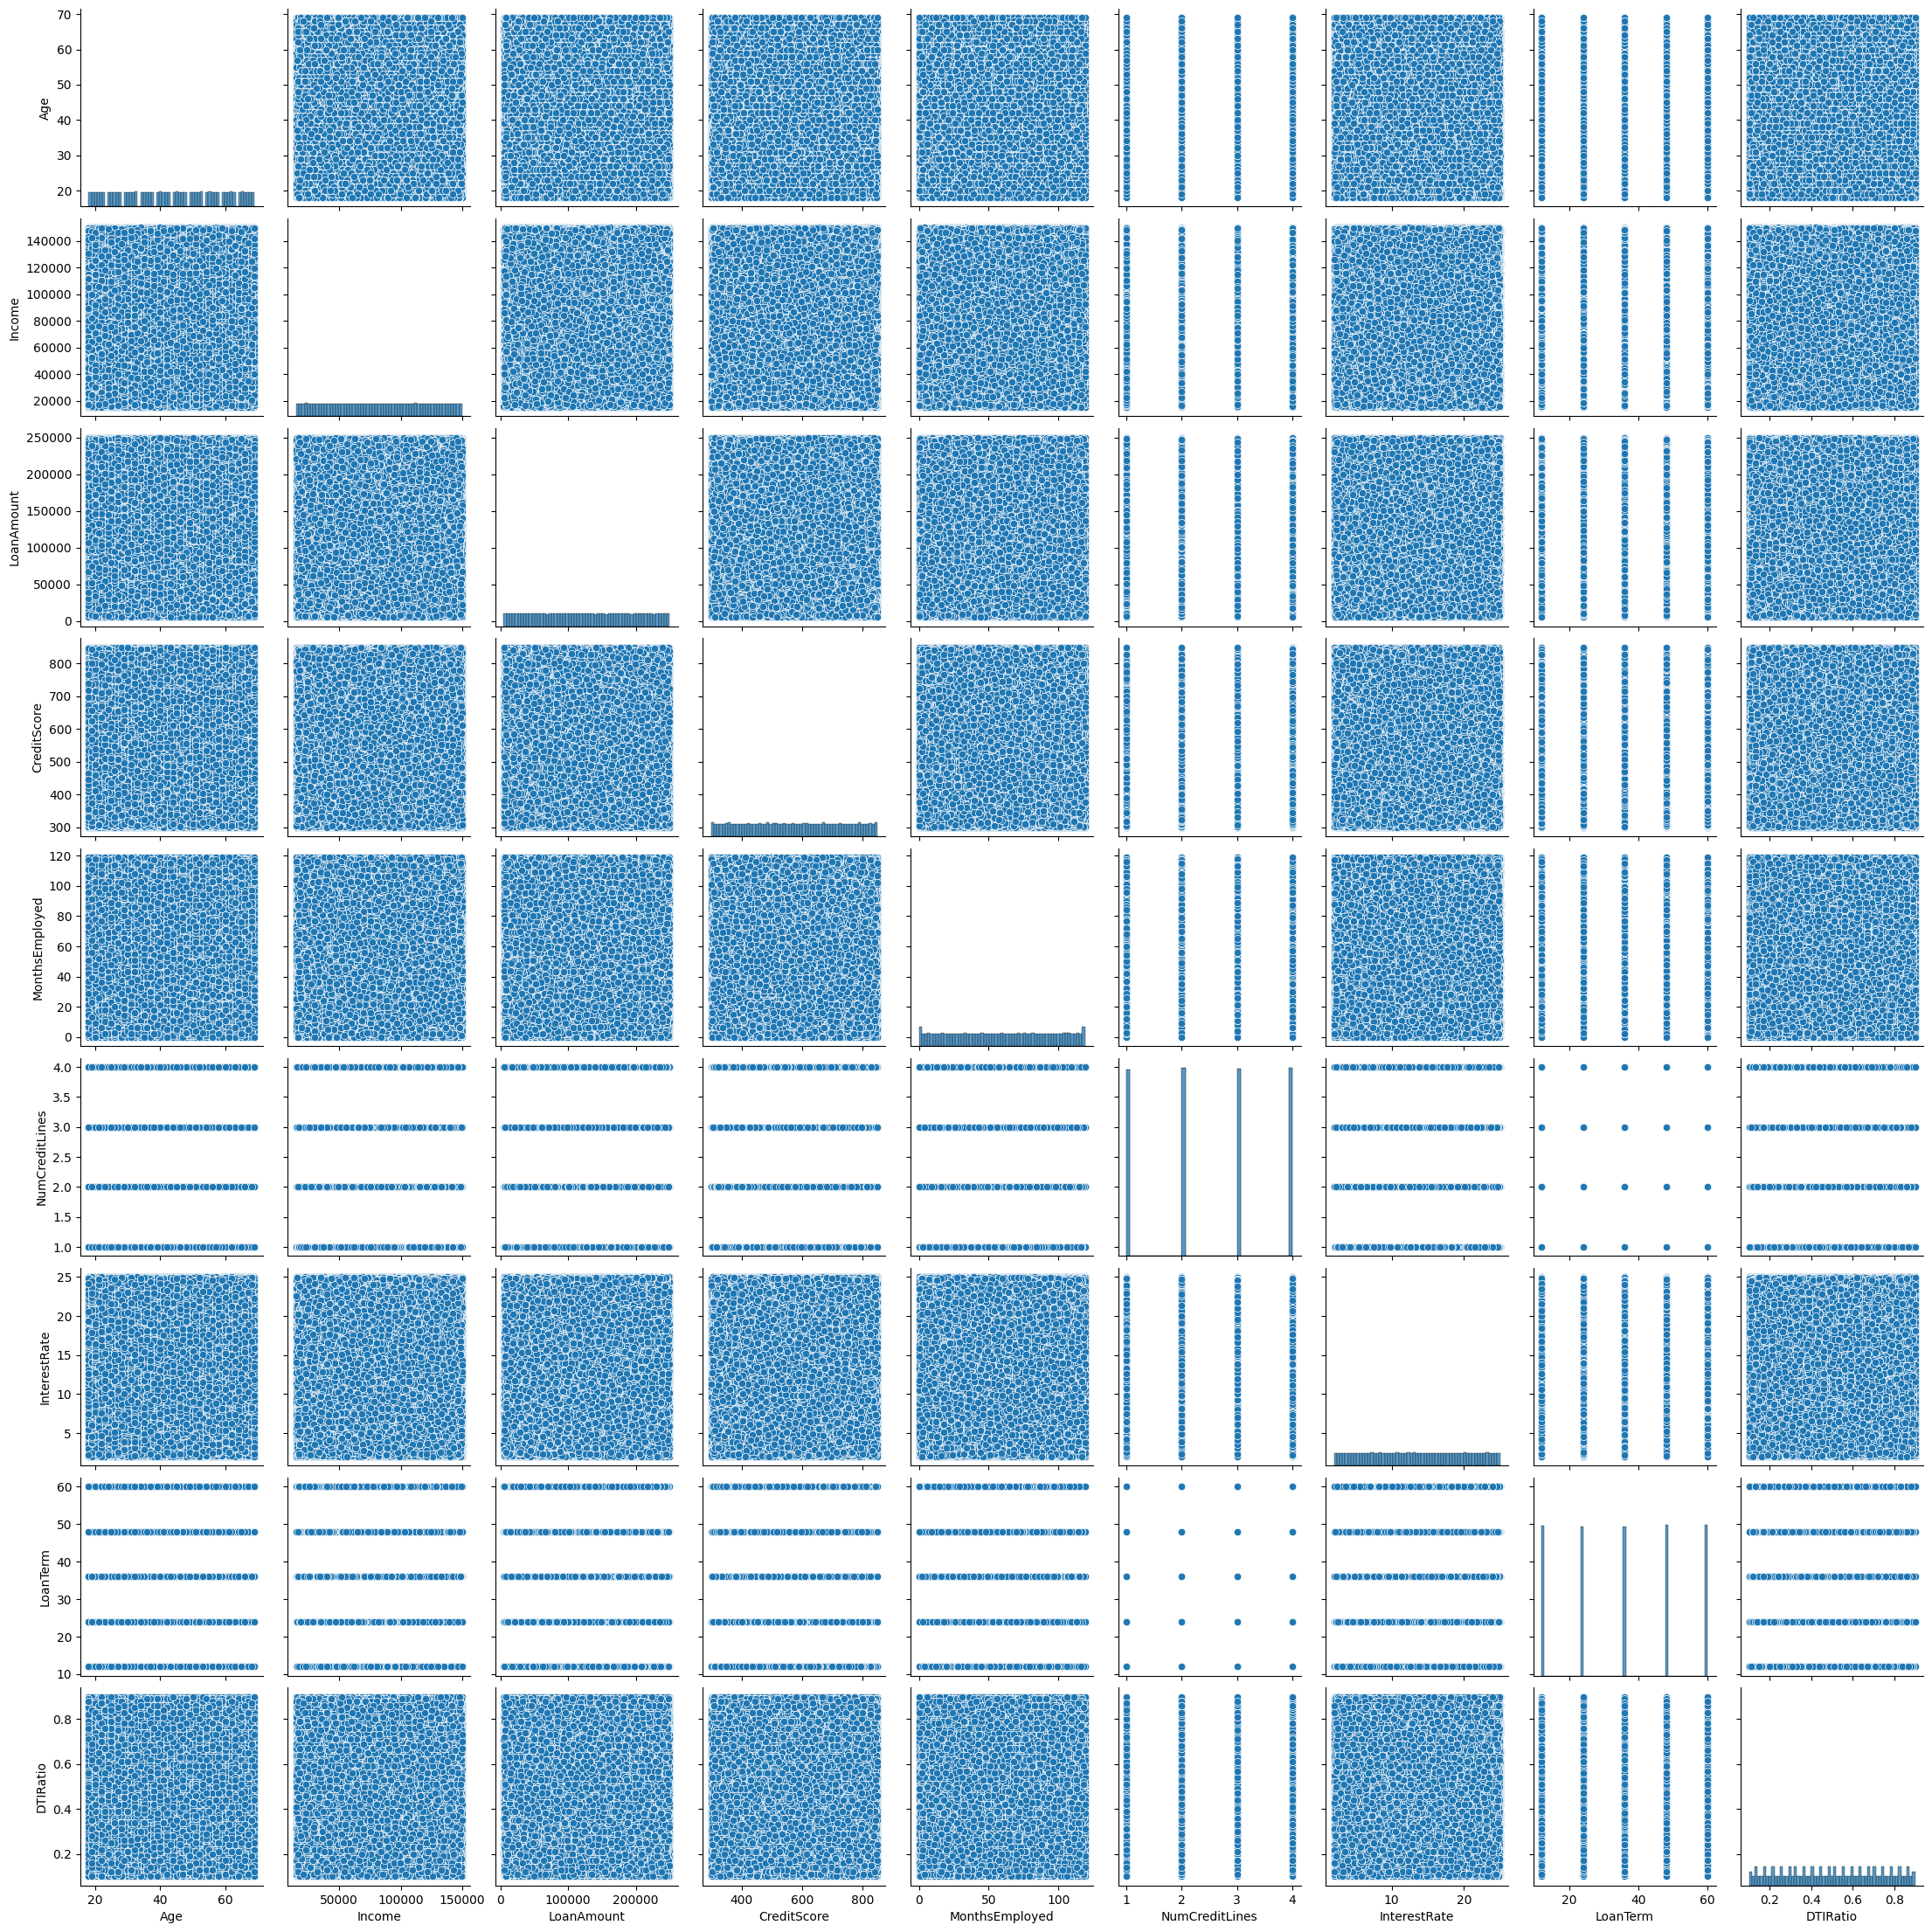

In [17]:
# Pair plot for numerical features (scatter plots)
sns.pairplot(X_train[numerical_columns])
plt.show()

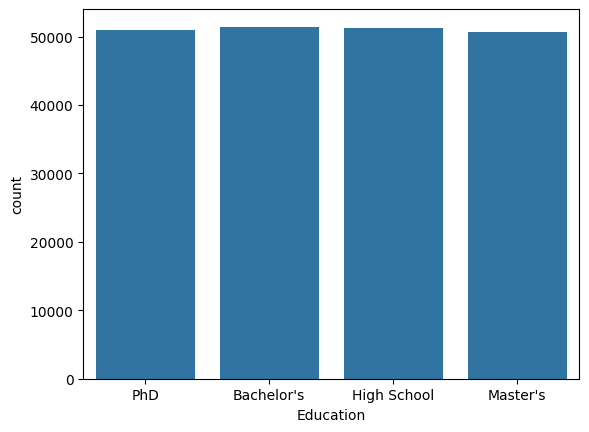

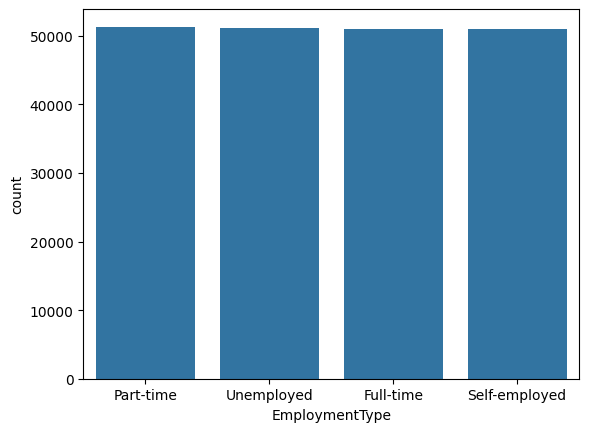

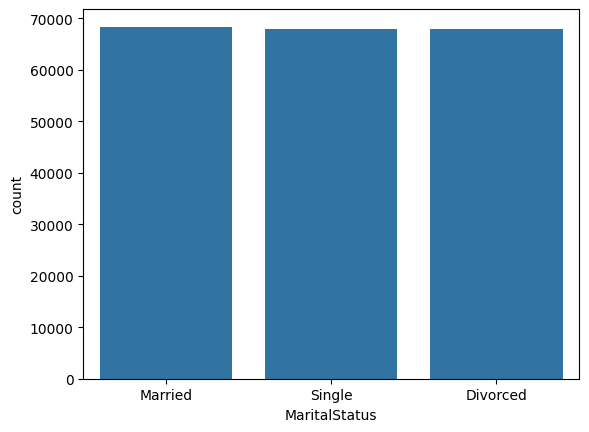

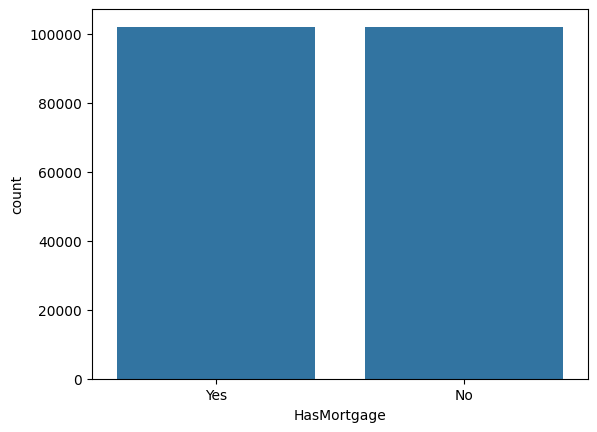

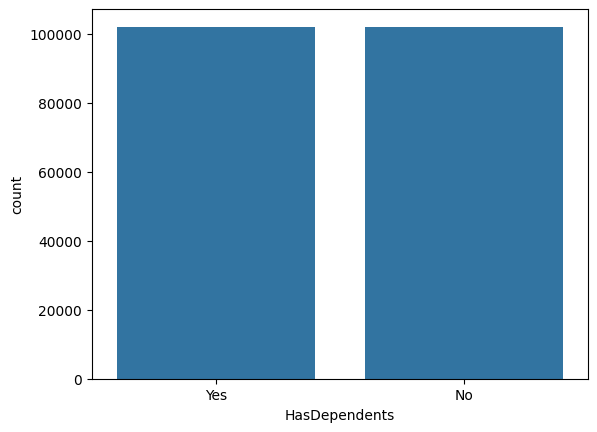

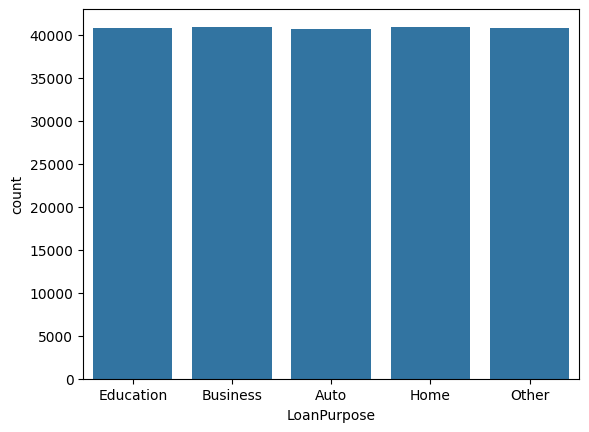

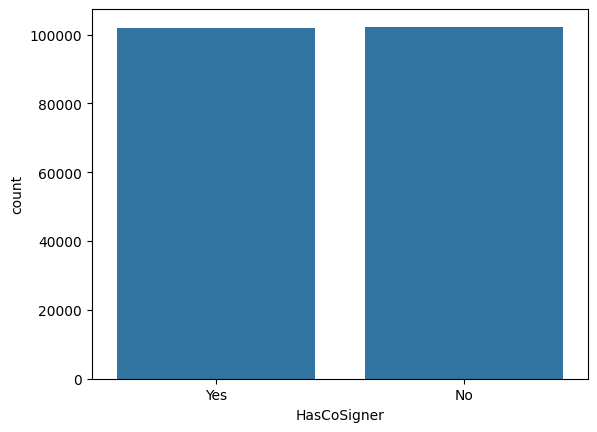

In [18]:
# Count plots for categorical features
for column in categorical_columns:
    sns.countplot(x=column, data=X_train)
    plt.show()

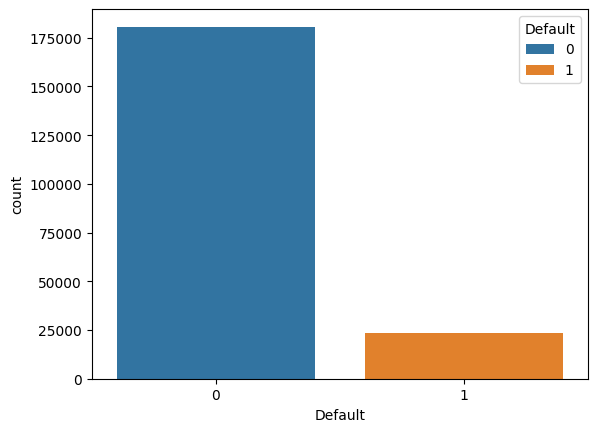

In [19]:
sns.countplot(x=y_train, hue=y_train)
plt.show()

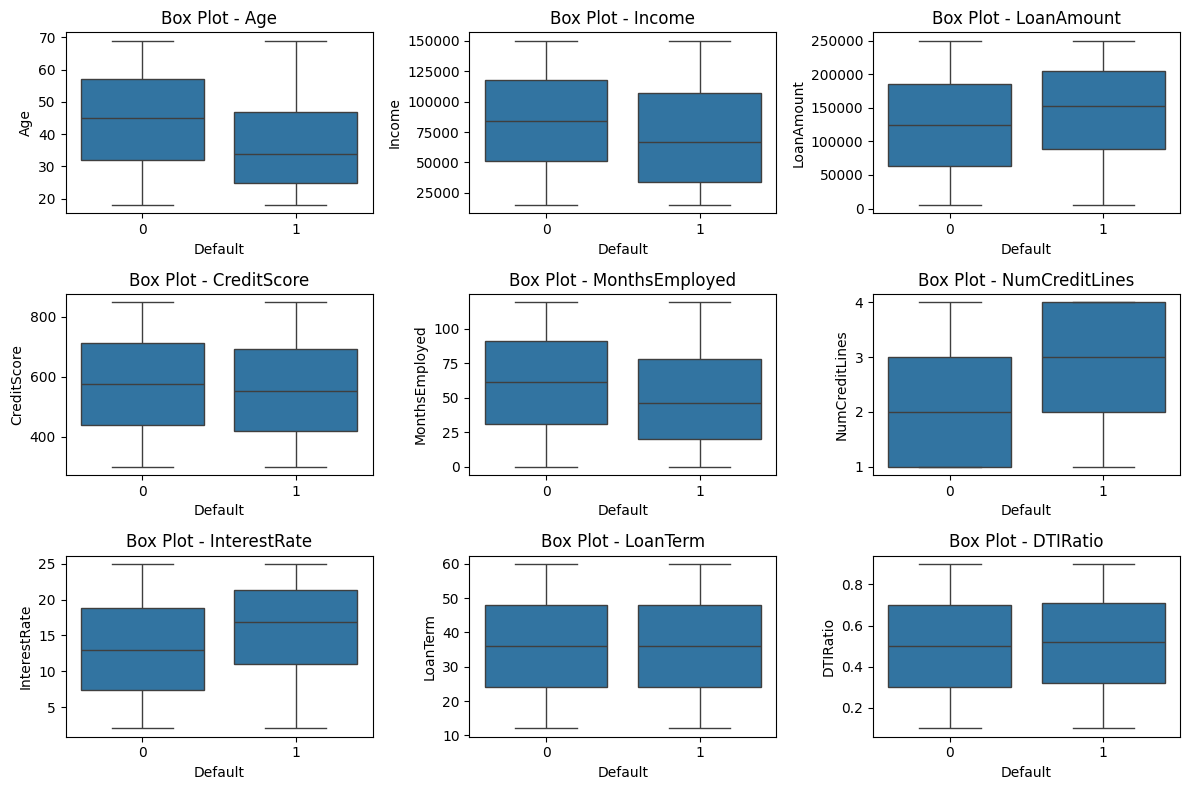

In [20]:
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Flatten the 3x3 array of subplots into a 1D array
axes = axes.flatten()

# Plot box plots for each numerical feature
for i, column in enumerate(numerical_columns):
    sns.boxplot(y=X_train[column], x=y, ax=axes[i])
    axes[i].set_title(f"Box Plot - {column}")

# Adjust layout
plt.tight_layout()
plt.show()

# Decision Tree

---



In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Hyperparameter Tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_encoded, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Handle Imbalanced Data
class_weights = {0: 1, 1: 5}  # Adjust weights based on the imbalance
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
decision_tree_model.fit(X_train_encoded, y_train)

# Cross-Validation
cv_scores = cross_val_score(decision_tree_model, X_train_encoded, y_train, cv=3)
print("Cross-Validation Scores:", cv_scores)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Cross-Validation Scores: [0.81497202 0.81388518 0.81453141]


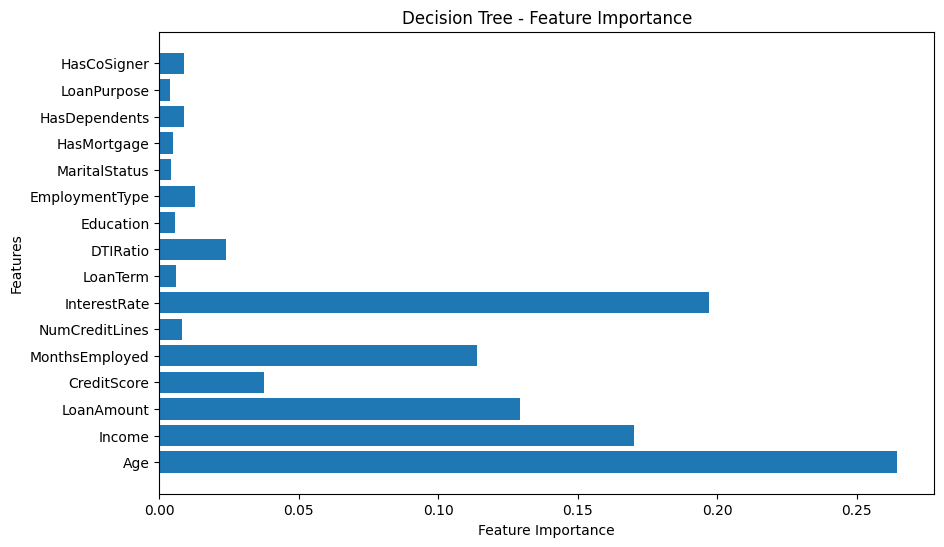

In [73]:
# Use the best hyperparameters
best_hyperparameters = {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
decision_tree = DecisionTreeClassifier(**best_hyperparameters, random_state=42, criterion='entropy')

# Train the Decision Tree classifier
decision_tree.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_encoded)

# Feature importance scores
feature_names = X_train.columns
feature_importances = decision_tree.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree - Feature Importance')
plt.show()

In [120]:
# Create a dictionary mapping feature names to importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the dictionary by importances in descending order
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Get the first 7 important features
top_7_features = sorted_feature_importances[:6]

# Get the names of the top 7 important features
top_7_features = [feature[0] for feature in top_7_features]

# Drop columns from X_train_encoded until only the top 7 features remain
X_train_encoded_top7 = X_train_encoded[top_7_features]
X_test_encoded_top7 = X_test_encoded[top_7_features]
X_train_scaled_top7 = X_train_scaled[top_7_features]
X_test_scaled_top7 = X_test_scaled[top_7_features]

In [110]:
smote = SMOTE(random_state=42)
X_train_encoded_top7_resampled, y_train_encoded_top7_resampled = smote.fit_resample(X_train_encoded_top7, y_train)

smote = SMOTE(random_state=42)
X_train_scaled_top7_resampled, y_train_scaled_top7_resampled = smote.fit_resample(X_train_scaled_top7, y_train)

In [76]:
y_pred = decision_tree.predict(X_test_encoded)

print("Decision Tree Evaluation:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Decision Tree confusion matrix:\n")
print(cm)

Decision Tree Evaluation:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45050
           1       0.43      0.06      0.10      6016

    accuracy                           0.88     51066
   macro avg       0.66      0.52      0.52     51066
weighted avg       0.83      0.88      0.84     51066

Decision Tree confusion matrix:

[[44588   462]
 [ 5666   350]]


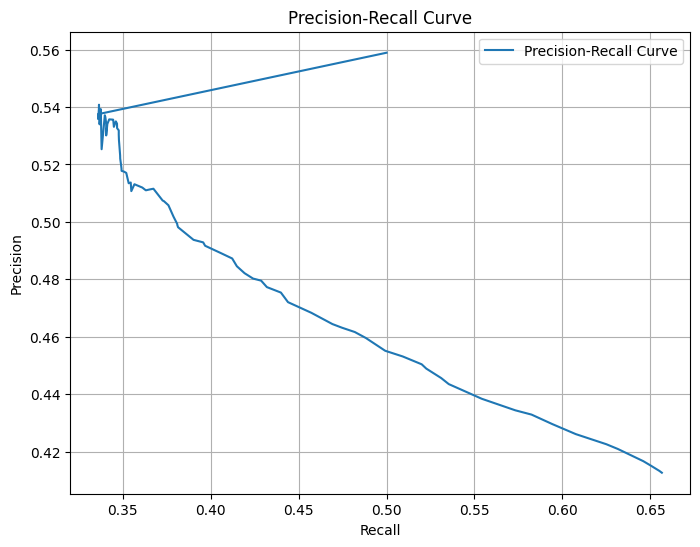

Best Threshold: 0.17171717171717174
Best F1-Score: 0.18165813436268466


In [77]:
from sklearn.metrics import precision_recall_curve

# Define a range of threshold values to test
threshold_values = np.linspace(0, 1, 100)

# Initialize lists to store precision, recall, and F1-score for each threshold
precisions = []
recalls = []
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in threshold_values:
    y_pred_thresholded = (decision_tree.predict_proba(X_test_encoded)[:, 1] > threshold).astype(int)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_thresholded)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)  # Add a small epsilon to avoid division by zero
    precisions.append(np.mean(precision))
    recalls.append(np.mean(recall))
    f1_scores.append(np.mean(f1))

# Convert lists to arrays
threshold_values = np.array(threshold_values)
precisions = np.array(precisions)
recalls = np.array(recalls)
f1_scores = np.array(f1_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold that maximizes F1-score
best_threshold_index = np.argmax(f1_scores)
best_threshold = threshold_values[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1-Score: {best_f1_score}")


In [78]:
# Adjusting decision threshold
new_threshold = best_threshold
y_pred_thresholded = (decision_tree.predict_proba(X_test_encoded)[:, 1] > new_threshold).astype(int)

print("Decision Tree Evaluation:\n")
print(classification_report(y_test, y_pred_thresholded))

cm_updated = confusion_matrix(y_test, y_pred_thresholded)
print("Decision Tree confusion matrix:\n")
print(cm_updated)


Decision Tree Evaluation:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     45050
           1       0.26      0.46      0.33      6016

    accuracy                           0.78     51066
   macro avg       0.59      0.64      0.60     51066
weighted avg       0.84      0.78      0.81     51066

Decision Tree confusion matrix:

[[37129  7921]
 [ 3220  2796]]


In [168]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, decision_tree.predict_proba(X_test_encoded)[:, 1])
auc_score1 = roc_auc_score(y_test, decision_tree.predict_proba(X_test_encoded)[:, 1])
print("Decision Tree: ", auc_score1)

Decision Tree:  0.7076927047665715


# KNN

---


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [5, 10, 20, 50, 100]}

# Initialize kNN model
knn_model = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_top7_resampled, y_train_scaled_top7_resampled)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 5}


In [88]:
# Train the model with the best parameters
best_k = grid_search.best_params_['n_neighbors']
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train_scaled_top7_resampled, y_train_scaled_top7_resampled)

# Make predictions on the test set
y_pred_best = best_knn_model.predict(X_test_scaled_top7)

# Evaluate the model with best parameters
print("\nkNN Evaluation with Best Parameters:")
print(classification_report(y_test, y_pred_best))
print("\nkNN Confusion Matrix with Best Parameters:")
print(confusion_matrix(y_test, y_pred_best))


kNN Evaluation with Best Parameters:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80     45050
           1       0.18      0.47      0.26      6016

    accuracy                           0.68     51066
   macro avg       0.54      0.59      0.53     51066
weighted avg       0.82      0.68      0.74     51066


kNN Confusion Matrix with Best Parameters:
[[32080 12970]
 [ 3192  2824]]


In [91]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_best)
auc_score2 = roc_auc_score(y_test, y_pred_best)
print("KNN: ", auc_score2)

KNN:  0.5907562814367016


# Logistics Regression

---



In [121]:
from sklearn.model_selection import cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Define parameter grid with proper concatenation
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'logisticregression__penalty': ['l1', 'l2']                # Penalty (L1 or L2)
}

# Create logistic regression model
log_reg_model = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced')

# Create a pipeline with standardization and logistic regression
pipeline = make_pipeline(StandardScaler(), log_reg_model)

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define grid search with stratified k-fold cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=stratified_kfold, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best parameters
grid_search.fit(X_train_scaled_top7_resampled, y_train_scaled_top7_resampled)

# Get the best estimator
best_lr_model = grid_search.best_estimator_

In [122]:
# Perform cross-validation predictions
y_pred = best_lr_model.predict(X_test_scaled_top7)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: ")
print(cm)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Confusion Matrix: 
[[29825 15225]
 [ 1920  4096]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.66      0.78     45050
           1       0.21      0.68      0.32      6016

    accuracy                           0.66     51066
   macro avg       0.58      0.67      0.55     51066
weighted avg       0.85      0.66      0.72     51066



In [126]:
fpr3, tpr3, thresholds3 = roc_curve(y_test, best_lr_model.predict_proba(X_test_scaled_top7)[:, 1])
auc_score3 = roc_auc_score(y_test, best_lr_model.predict_proba(X_test_scaled_top7)[:, 1])
print("Logistics Regression: ", auc_score3)

Logistics Regression:  0.732969170631922


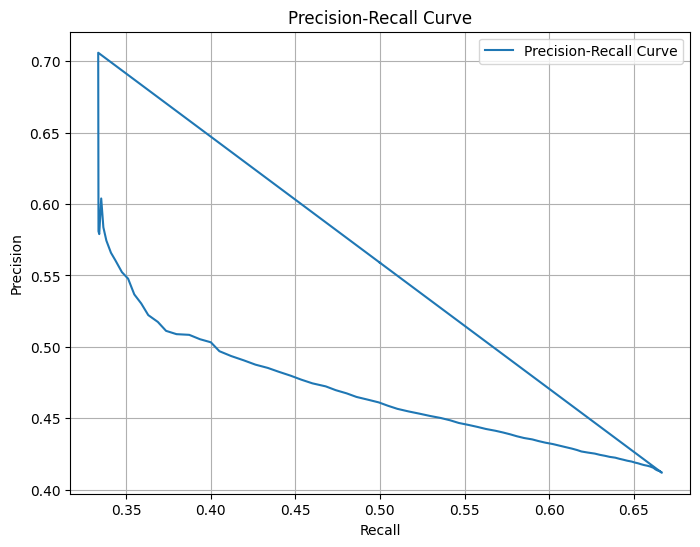

Best Threshold: 0.6060606060606061
Best F1-Score: 0.18572096081025388


In [224]:
# Define a range of threshold values to test
threshold_values = np.linspace(0, 1, 100)

# Initialize lists to store precision, recall, and F1-score for each threshold
precisions = []
recalls = []
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in threshold_values:
    y_pred_thresholded = (best_lr_model.predict_proba(X_test_scaled_top7)[:, 1] > threshold).astype(int)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_thresholded)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)  # Add a small epsilon to avoid division by zero
    precisions.append(np.mean(precision))
    recalls.append(np.mean(recall))
    f1_scores.append(np.mean(f1))

# Convert lists to arrays
threshold_values = np.array(threshold_values)
precisions = np.array(precisions)
recalls = np.array(recalls)
f1_scores = np.array(f1_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold that maximizes F1-score
best_threshold_index = np.argmax(f1_scores)
best_threshold = threshold_values[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1-Score: {best_f1_score}")


In [225]:
# Adjusting decision threshold
new_threshold = best_threshold
y_pred_thresholded = (best_lr_model.predict_proba(X_test_scaled_top7)[:, 1] > new_threshold).astype(int)

print("Logistics Regression Evaluation:\n")
print(classification_report(y_test, y_pred_thresholded))

cm_updated = confusion_matrix(y_test, y_pred_thresholded)
print("Logistics Regression confusion matrix:\n")
print(cm_updated)


Logistics Regression Evaluation:

              precision    recall  f1-score   support

           0       0.92      0.82      0.87     45050
           1       0.27      0.50      0.35      6016

    accuracy                           0.78     51066
   macro avg       0.59      0.66      0.61     51066
weighted avg       0.85      0.78      0.81     51066

Logistics Regression confusion matrix:

[[36763  8287]
 [ 3020  2996]]


# Naïve Bayes

---



In [136]:
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

# Define the parameter grid for Gaussian Naive Bayes
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Grid search to find the best parameters
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled_resampled, y_train_scaled_resampled)

# Get the best parameters
best_params = grid_search.best_params_

# Train the model with the best parameters
model_NB_tuned = GaussianNB(var_smoothing=best_params['var_smoothing'])
model_NB_tuned.fit(X_train_scaled_resampled, y_train_scaled_resampled)

# Evaluate the tuned model
y_pred_tuned = model_NB_tuned.predict(X_test_scaled)
print("\nTuned Naive Bayes Evaluation:\n")
print(classification_report(y_test, y_pred_tuned))
print("\nTuned Naive Bayes confusion matrix:\n")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
print(cm_tuned)


Tuned Naive Bayes Evaluation:

              precision    recall  f1-score   support

           0       0.93      0.71      0.81     45050
           1       0.22      0.61      0.32      6016

    accuracy                           0.70     51066
   macro avg       0.58      0.66      0.56     51066
weighted avg       0.85      0.70      0.75     51066


Tuned Naive Bayes confusion matrix:

[[31948 13102]
 [ 2333  3683]]


In [139]:
fpr4, tpr4, thresholds4 = roc_curve(y_test, model_NB_tuned.predict_proba(X_test_scaled)[:, 1])
auc_score4 = roc_auc_score(y_test, model_NB_tuned.predict_proba(X_test_scaled)[:, 1])
print("Naive Bayes: ", auc_score4)

Naive Bayes:  0.725617458143434


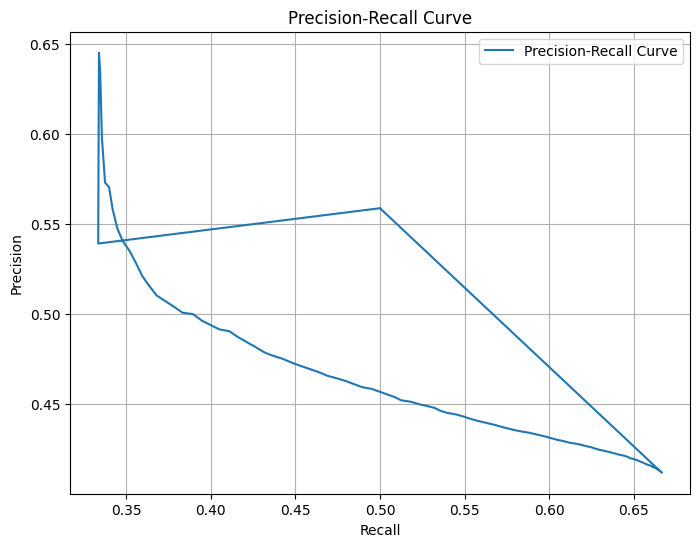

Best Threshold: 0.595959595959596
Best F1-Score: 0.18246130089740456
Naive Bayese Evaluation:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86     45050
           1       0.26      0.49      0.34      6016

    accuracy                           0.77     51066
   macro avg       0.59      0.65      0.60     51066
weighted avg       0.84      0.77      0.80     51066

Naive Bayes confusion matrix:

[[36636  8414]
 [ 3096  2920]]


In [141]:
from sklearn.metrics import precision_recall_curve

# Define a range of threshold values to test
threshold_values = np.linspace(0, 1, 100)

# Initialize lists to store precision, recall, and F1-score for each threshold
precisions = []
recalls = []
f1_scores = []

# Calculate precision, recall, and F1-score for each threshold
for threshold in threshold_values:
    y_pred_thresholded = (model_NB_tuned.predict_proba(X_test_scaled)[:, 1] > threshold).astype(int)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_thresholded)
    f1 = 2 * (precision * recall) / (precision + recall + 1e-8)  # Add a small epsilon to avoid division by zero
    precisions.append(np.mean(precision))
    recalls.append(np.mean(recall))
    f1_scores.append(np.mean(f1))

# Convert lists to arrays
threshold_values = np.array(threshold_values)
precisions = np.array(precisions)
recalls = np.array(recalls)
f1_scores = np.array(f1_scores)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the threshold that maximizes F1-score
best_threshold_index = np.argmax(f1_scores)
best_threshold = threshold_values[best_threshold_index]
best_f1_score = f1_scores[best_threshold_index]

print(f"Best Threshold: {best_threshold}")
print(f"Best F1-Score: {best_f1_score}")

# Adjusting decision threshold
new_threshold = best_threshold
y_pred_thresholded = (model_NB_tuned.predict_proba(X_test_scaled)[:, 1] > new_threshold).astype(int)

print("Naive Bayese Evaluation:\n")
print(classification_report(y_test, y_pred_thresholded))

cm_updated = confusion_matrix(y_test, y_pred_thresholded)
print("Naive Bayes confusion matrix:\n")
print(cm_updated)

# Random Forest

---



In [143]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
tuned_rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(tuned_rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train_scaled_resampled, y_train_scaled_resampled)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Evaluate the model
y_pred_rf = best_rf.predict(X_test_scaled)
print("\Random Forest Evaluation:\n")
print(classification_report(y_test, y_pred_rf))
print("\Random Forest confusion matrix:\n")
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 280}
\Random Forest Evaluation:

              precision    recall  f1-score   support

           0       0.91      0.86      0.89     45050
           1       0.28      0.39      0.33      6016

    accuracy                           0.81     51066
   macro avg       0.60      0.63      0.61     51066
weighted avg       0.84      0.81      0.82     51066

\Random Forest confusion matrix:

[[38833  6217]
 [ 3642  2374]]


In [145]:
fpr5, tpr5, thresholds5 = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
auc_score5 = roc_auc_score(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
print("Random Forest: ", auc_score5)

Random Forest:  0.7240471174168182


# Neural Network

---



In [157]:
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense

# Build the neural network model
neural_network = Sequential()
neural_network.add(Dense(128, activation='relu', input_shape=(X_train_scaled_resampled.shape[1],)))
neural_network.add(Dense(64, activation='relu'))
neural_network.add(Dense(1, activation='sigmoid'))

# Compile the model
neural_network.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with resampled data
history = neural_network.fit(X_train_scaled_resampled, y_train_scaled_resampled, epochs=50, batch_size=64, validation_data=(X_test_encoded, y_test))

# Evaluate the model
score = neural_network.evaluate(X_test_scaled, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Predict probabilities on the test set
y_pred_prob = neural_network.predict(X_test_scaled)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Epoch 1/50
5645/5645 [==============================] - 14s 2ms/step - loss: 0.5368 - accuracy: 0.7295 - val_loss: 12248.4248 - val_accuracy: 0.8822
Epoch 2/50
5645/5645 [==============================] - 13s 2ms/step - loss: 0.5258 - accuracy: 0.7378 - val_loss: 13999.1826 - val_accuracy: 0.8822
Epoch 3/50
5645/5645 [==============================] - 13s 2ms/step - loss: 0.5193 - accuracy: 0.7421 - val_loss: 16857.0195 - val_accuracy: 0.8822
Epoch 4/50
5645/5645 [==============================] - 21s 4ms/step - loss: 0.5129 - accuracy: 0.7464 - val_loss: 18517.4961 - val_accuracy: 0.8822
Epoch 5/50
5645/5645 [==============================] - 22s 4ms/step - loss: 0.5067 - accuracy: 0.7511 - val_loss: 16395.9980 - val_accuracy: 0.8822
Epoch 6/50
5645/5645 [==============================] - 13s 2ms/step - loss: 0.5006 - accuracy: 0.7558 - val_loss: 18396.9648 - val_accuracy: 0.8822
Epoch 7/50
5645/5645 [==============================] - 13s 2ms/step - loss: 0.4954 - accuracy: 0.7595 - v

In [158]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate FPR and TPR
fpr6 = FP / (FP + TN)
tpr6 = TP / (TP + FN)

auc_score6 = roc_auc_score(y_test, y_pred_prob)
print('AUC Score:', auc_score6)


AUC Score: 0.6894342832727229


# Support Vector Machine

---



In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

svc = SVC(kernel="linear")
svc_rfe = RFE(svc, n_features_to_select=7)
svc_rfe.fit(X_train_scaled_top7_resampled, y_train_scaled_top7_resampled)

In [161]:
y_pred = svc_rfe.predict(X_test_scaled_top7)
print("\nSVM Evaluation:\n")
print(classification_report(y_test, y_pred))
print("\nSVm  confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)


SVM Evaluation:

              precision    recall  f1-score   support

           0       0.94      0.66      0.77     45050
           1       0.21      0.69      0.32      6016

    accuracy                           0.66     51066
   macro avg       0.58      0.67      0.55     51066
weighted avg       0.85      0.66      0.72     51066


SVm  confusion matrix:

[[29601 15449]
 [ 1879  4137]]


In [163]:
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_pred)
auc_score7 = roc_auc_score(y_test, y_pred)
print("Support Vector Machine: ", auc_score7)

Support Vector Machine:  0.6723680728564007


# Model Comparison

---



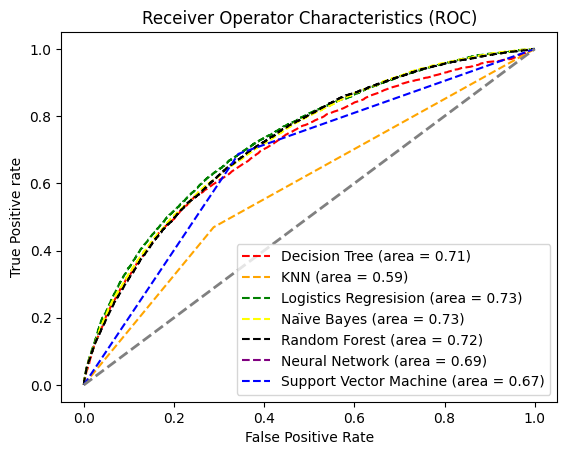

In [170]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "red", label = 'Decision Tree (area = %0.2f)' % auc_score1)
plt.plot(fpr2, tpr2, linestyle = "--", color = "orange", label='KNN (area = %0.2f)' % auc_score2)
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = 'Logistics Regresision (area = %0.2f)' % auc_score3)
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = 'Naïve Bayes (area = %0.2f)' % auc_score4)
plt.plot(fpr5, tpr5, linestyle = "--", color = "black", label = 'Random Forest (area = %0.2f)' % auc_score5)
plt.plot(fpr6, tpr6, linestyle = "--", color = "purple", label = 'Neural Network (area = %0.2f)' % auc_score6)
plt.plot(fpr7, tpr7, linestyle = "--", color = "blue", label = 'Support Vector Machine (area = %0.2f)' % auc_score7)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

# Model Storing

---



In [146]:
# file name, using *.pickle as a file extension
filename = "random_forest.pickle"

# save model
pickle.dump(best_rf, open(filename, "wb"))

In [140]:
filename = "naive_bayes.pickle"
pickle.dump(model_NB_tuned, open(filename, "wb"))

In [80]:
filename = "decision_tree.pickle"
pickle.dump(decision_tree, open(filename, "wb"))

In [127]:
filename = "logistics_regression.pickle"
pickle.dump(best_lr_model, open(filename, "wb"))

In [147]:
filename = "knn.pickle"
pickle.dump(best_knn_model, open(filename, "wb"))

In [166]:
filename = "neural_network.pickle"
pickle.dump(neural_network, open(filename, "wb"))

In [165]:
filename = "support_vector_machine.pickle"
pickle.dump(svc_rfe, open(filename, "wb"))

# Model Loading

---



In [171]:
knn = pickle.load(open("knn.pickle", "rb"))
decision_tree = pickle.load(open("decision_tree.pickle", "rb"))
logistics_regression = pickle.load(open("logistics_regression.pickle", "rb"))
naive_bayes = pickle.load(open("naive_bayes.pickle", "rb"))
random_forest = pickle.load(open("random_forest.pickle", "rb"))
neural_network = pickle.load(open("neural_network.pickle", "rb"))
svc = pickle.load(open("support_vector_machine.pickle", "rb"))

# Model Interacting

---



In [172]:
newData = pd.read_csv("/content/drive/MyDrive/Data/((GAssign) NewApplicants.csv")

print(newData.isnull().sum())
newData.duplicated().any()

LoanID             0
Age                0
Income             0
LoanAmount         0
CreditScore        0
MonthsEmployed     0
NumCreditLines     0
InterestRate       0
LoanTerm           0
DTIRatio           0
Education          0
EmploymentType     0
MaritalStatus      0
HasMortgage        0
HasDependents      0
LoanPurpose        0
HasCoSigner        0
Default           20
dtype: int64


False

In [180]:
# Identify the features (X) and the target variable (y)
new_X = newData.drop(["LoanID", "Default"], axis=1)  # Features excluding the target variable

new_X_encoded = new_X.copy()

# Apply label encoding to each categorical column
for column in categorical_columns:
    new_X_encoded[column] = label_encoder.fit_transform(new_X_encoded[column])

new_X_scaled = new_X_encoded.copy()
new_X_scaled[numerical_columns] = scaler.fit_transform(new_X_scaled[numerical_columns])

In [181]:
new_X_encoded_top7 = new_X_encoded.copy()
new_X_scaled_top7 = new_X_scaled.copy()

# Drop columns from X_train_encoded until only the top 7 features remain
new_X_encoded_top7 = new_X_encoded_top7[top_7_features]
new_X_scaled_top7 = new_X_scaled_top7[top_7_features]

In [182]:
dt_threshold = 0.17171717171717174
lr_threshold = 0.6060606060606061
nb_threshold = 0.595959595959596

In [204]:
y_predicted_decision_tree = decision_tree.predict(new_X_encoded)
y_predicted_decision_tree_thresholded = (decision_tree.predict_proba(new_X_encoded)[:, 1] > dt_threhold).astype(int)

y_predicted_knn = knn.predict(new_X_scaled_top7)

y_predicted_logistics_regression = logistics_regression.predict(new_X_scaled_top7)
y_predicted_logistics_regression_thresholded = (logistics_regression.predict_proba(new_X_scaled_top7)[:, 1] > lr_threshold).astype(int)

y_predicted_naive_bayes = naive_bayes.predict(new_X_scaled)
y_predicted_naive_bayes_thresholded = (naive_bayes.predict_proba(new_X_scaled)[:, 1] > nb_threshold).astype(int)

y_predicted_random_forest = random_forest.predict(new_X_scaled)

y_predicted_neural_network = neural_network.predict(new_X_scaled)
y_predicted_neural_network = (y_pred_prob > 0.5).astype(int)

y_predicted_svc = svc.predict(new_X_scaled_top7)

1/1 [==============================] - 0s 27ms/step


In [213]:
# Extract values from inner arrays
y_predicted_neural_network_flat = [x[0] for x in y_predicted_neural_network]

# Keep only the first 20 rows of data
y_predicted_neural_network_flat = y_predicted_neural_network_flat[:20]

In [226]:
import csv

# Create a DataFrame with the predicted values
predictions_df = pd.DataFrame({
    'Decision_Tree': y_predicted_decision_tree,
    'Decision_Tree_Thresholded': y_predicted_decision_tree_thresholded,
    'KNN': y_predicted_knn,
    'Logistic_Regression': y_predicted_logistics_regression,
    'Logistic_Regression_Thresholded': y_predicted_logistics_regression_thresholded,
    'Naive_Bayes': y_predicted_naive_bayes,
    'Naive_Bayes_Thresholded': y_predicted_naive_bayes_thresholded,
    'Random_Forest': y_predicted_random_forest,
    'Neural_Network': y_predicted_neural_network_flat,
    'SVC': y_predicted_svc
})

# Assuming df is your DataFrame containing the data you want to write to a CSV file
predictions_df.to_csv('/content/drive/MyDrive/Data/output.csv', index=False)